In [22]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

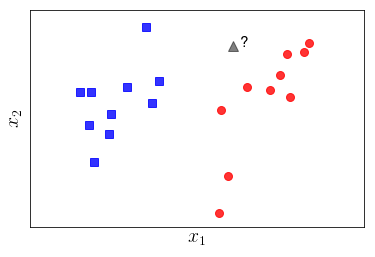

In [23]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .5)
plt.text(3.6, 2.5, r'?', fontsize=15)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('pla1.png', bbox_inches='tight', dpi = 300)
plt.show()

In [24]:
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
# X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

from cvxopt import matrix, solvers
# build P
Xbar = np.concatenate((X0, -X1), axis = 0)
print(Xbar.shape)
Q = matrix(Xbar.dot(Xbar.T))
p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(Q, p, G, h, A, b)

l = np.array(sol['x'])

(20, 2)


In [25]:
# calculate w and b
w = Xbar.T.dot(l)
b = 0
NS = 0
S = []

# print(y.shape)

for i in range(2*N):
    if l[i] > 1e-8:
        NS += 1 
        S.append(i)
for n in S:
    tmp = 0 
    for m in S:
        tmp += l[m]*y[:, m]*X[:, m].T.dot(X[:, n])
    b += y[:, n] - tmp 
print(S)
b/= NS 

[0, 2, 12]


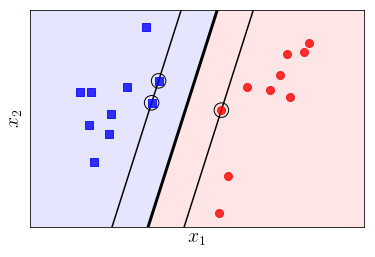

In [26]:
# draw
# plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

## fill different color for each class 
y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha='0.1')
plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')


plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors 
for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)
    
    
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('svn1.png', bbox_inches='tight', dpi = 300)
plt.show()

\\(x^2\\)

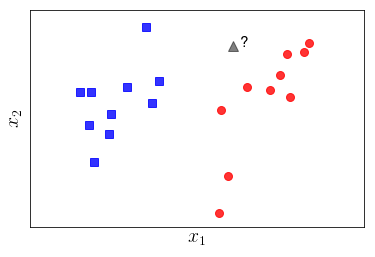

In [27]:
# list of points 


import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .5)
plt.text(3.6, 2.5, r'?', fontsize=15)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('pla1.png', bbox_inches='tight', dpi = 300)
plt.show()